# Image Segmentation with OpenCV

In [1]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np

## Contents

* Fundamental Edge Detection
* Canny Algorithm
* Hough Transform
* Thresholding

### Fundamental Edge Detection

(834, 1114)


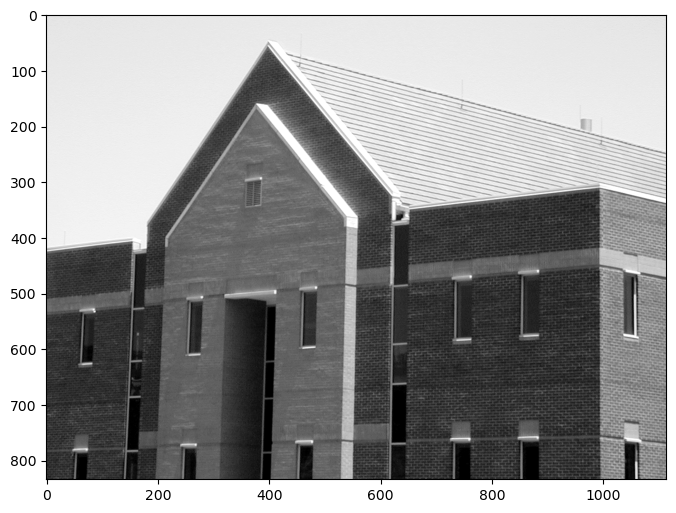

In [3]:
fname = 'Images/Building.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
W,H=img.shape
print(img.shape)
ratio=H/W
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(img, cmap='gray')

(Text(0.5, 1.0, 'Sobel Y: Absolute'), ([], []), ([], []))

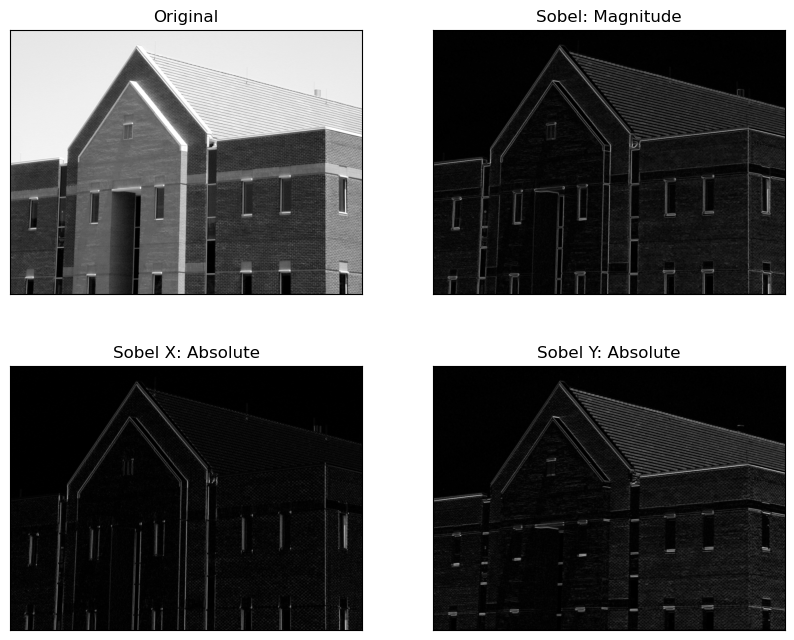

In [4]:
# Sobel operators

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

sobel_mag = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))

fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Sobel: Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(np.abs(sobelx),cmap = 'gray')
plt.title('Sobel X: Absolute'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(np.abs(sobely),cmap = 'gray')
plt.title('Sobel Y: Absolute'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y: Absolute'), ([], []), ([], []))

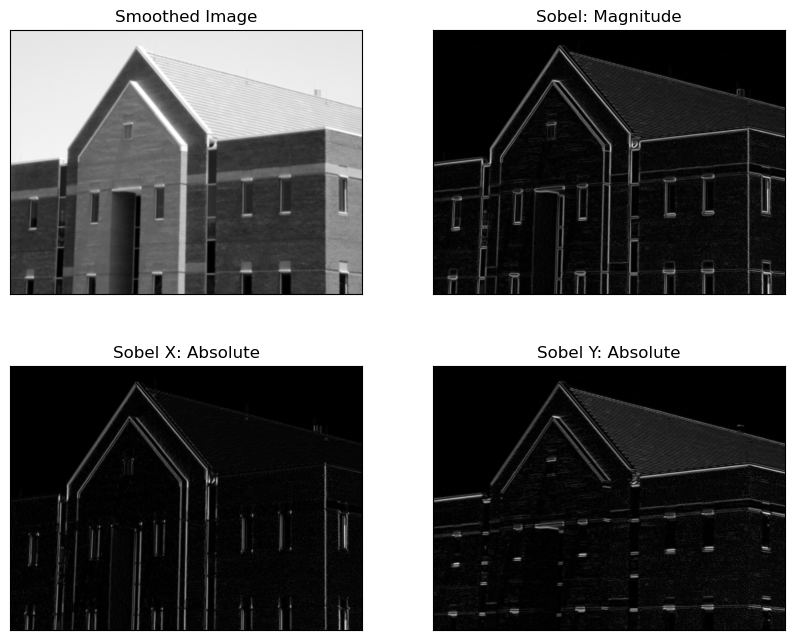

In [5]:
# Sobel operators on smoothed Image

img_smooth = cv2.GaussianBlur (img, (9,9), 0)
sobelx = cv2.Sobel(img_smooth,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_smooth,cv2.CV_64F,0,1,ksize=5)

sobel_mag = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))

fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img_smooth,cmap = 'gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Sobel: Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(np.abs(sobelx),cmap = 'gray')
plt.title('Sobel X: Absolute'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(np.abs(sobely),cmap = 'gray')
plt.title('Sobel Y: Absolute'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel : Magnitude Thresholded'), ([], []), ([], []))

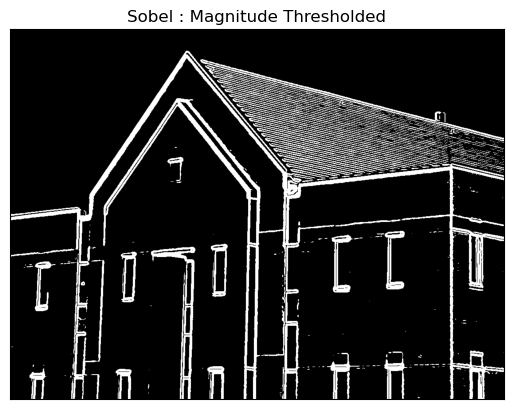

In [6]:
# Thresholding the gradient
ret,thresh1 = cv2.threshold(sobel_mag,755,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap = 'gray')
plt.title('Sobel : Magnitude Thresholded'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y: Absolute'), ([], []), ([], []))

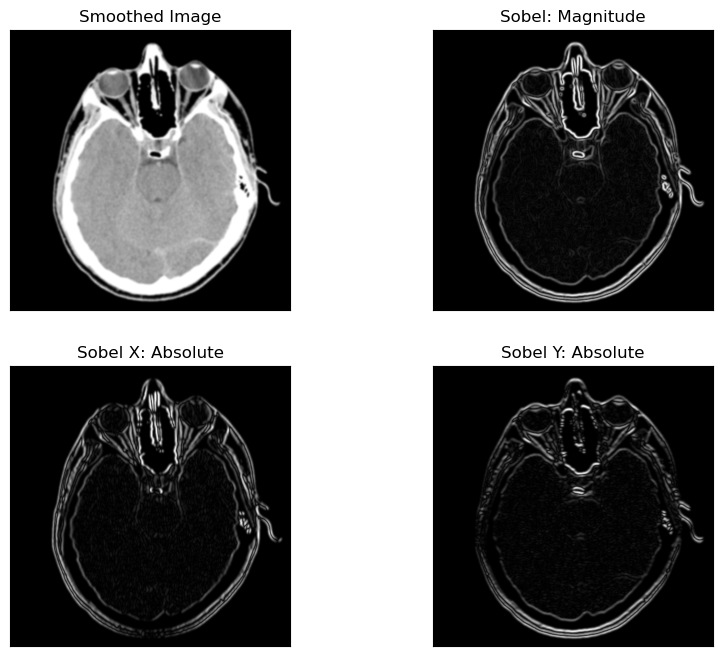

In [7]:
# A more difficult image
fname = 'Images/HeadCT.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
# Sobel operators on smoothed Image

img_smooth = cv2.GaussianBlur (img, (7,7), 0)
sobelx = cv2.Sobel(img_smooth,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_smooth,cv2.CV_64F,0,1,ksize=5)

sobel_mag = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))

fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img_smooth,cmap = 'gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Sobel: Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(np.abs(sobelx),cmap = 'gray')
plt.title('Sobel X: Absolute'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(np.abs(sobely),cmap = 'gray')
plt.title('Sobel Y: Absolute'), plt.xticks([]), plt.yticks([])

### Canny Algorithm

(Text(0.5, 1.0, 'Canny'), ([], []), ([], []))

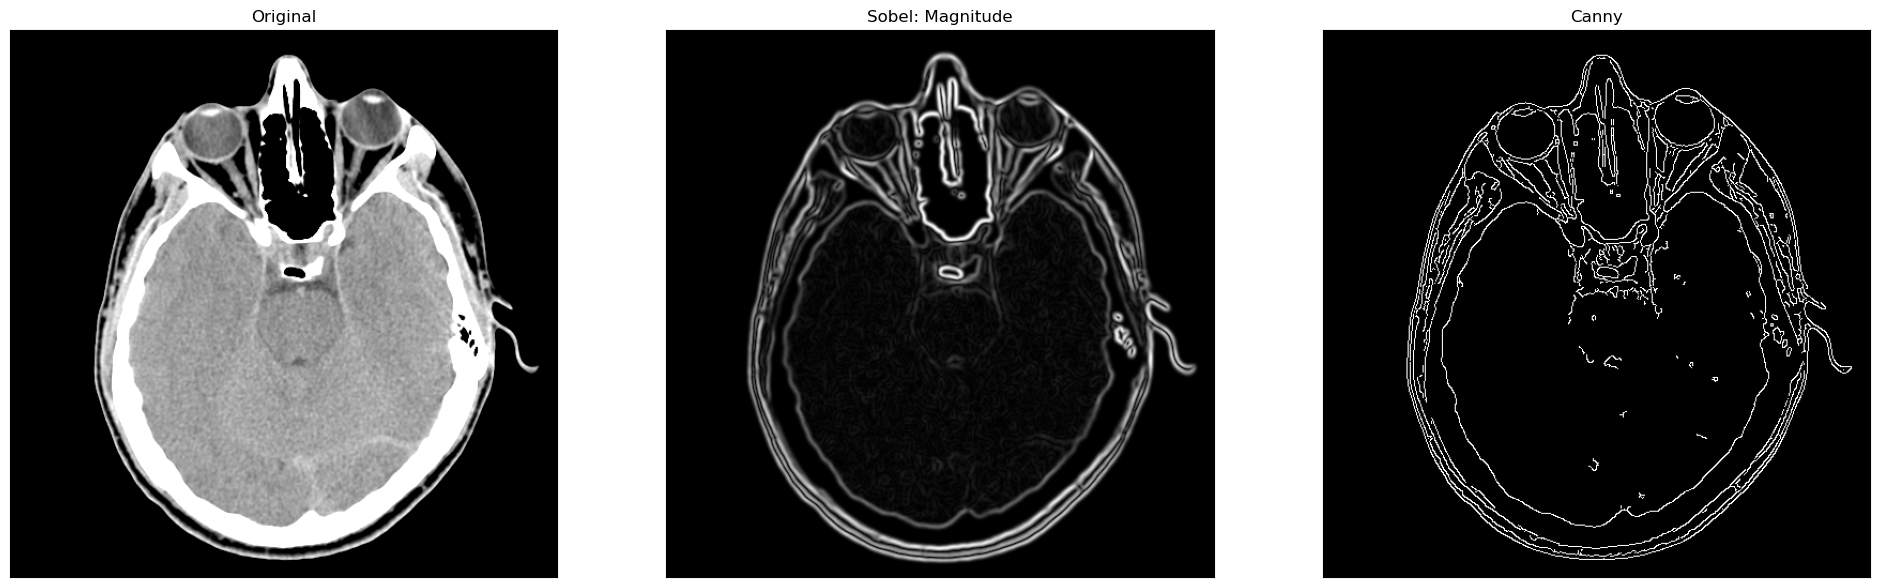

In [8]:
edges = cv2.Canny(img,100,200)

fig = plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Sobel: Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])


### Hough Transform

(Text(0.5, 1.0, 'Hough: detected lines'), ([], []), ([], []))

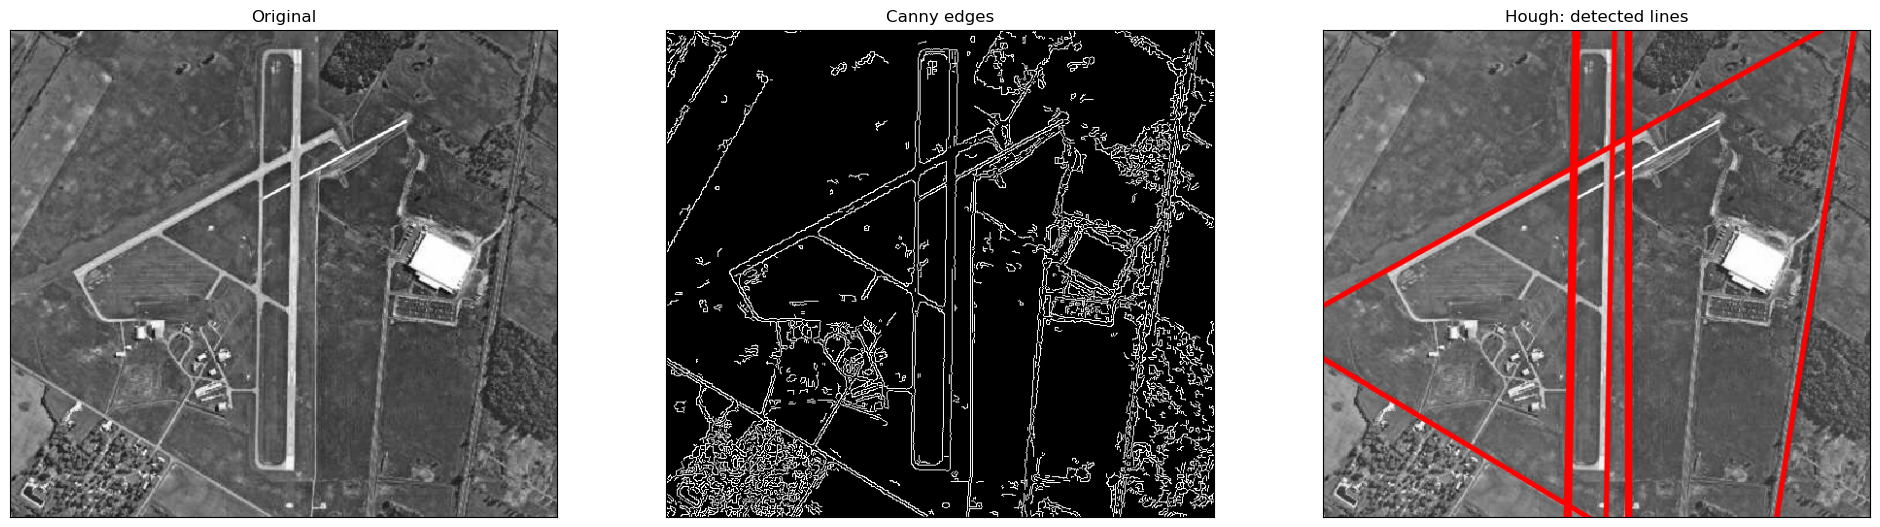

In [10]:
fname = 'Images/Airport.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img,100,200)
# HoughLines(image, rho_resolution, theta_resolution, how many pixels for a line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Draw the lines
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img_dst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
        
fig = plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges,cmap = 'gray')
plt.title('Canny edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected lines'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Hough: detected circles'), ([], []), ([], []))

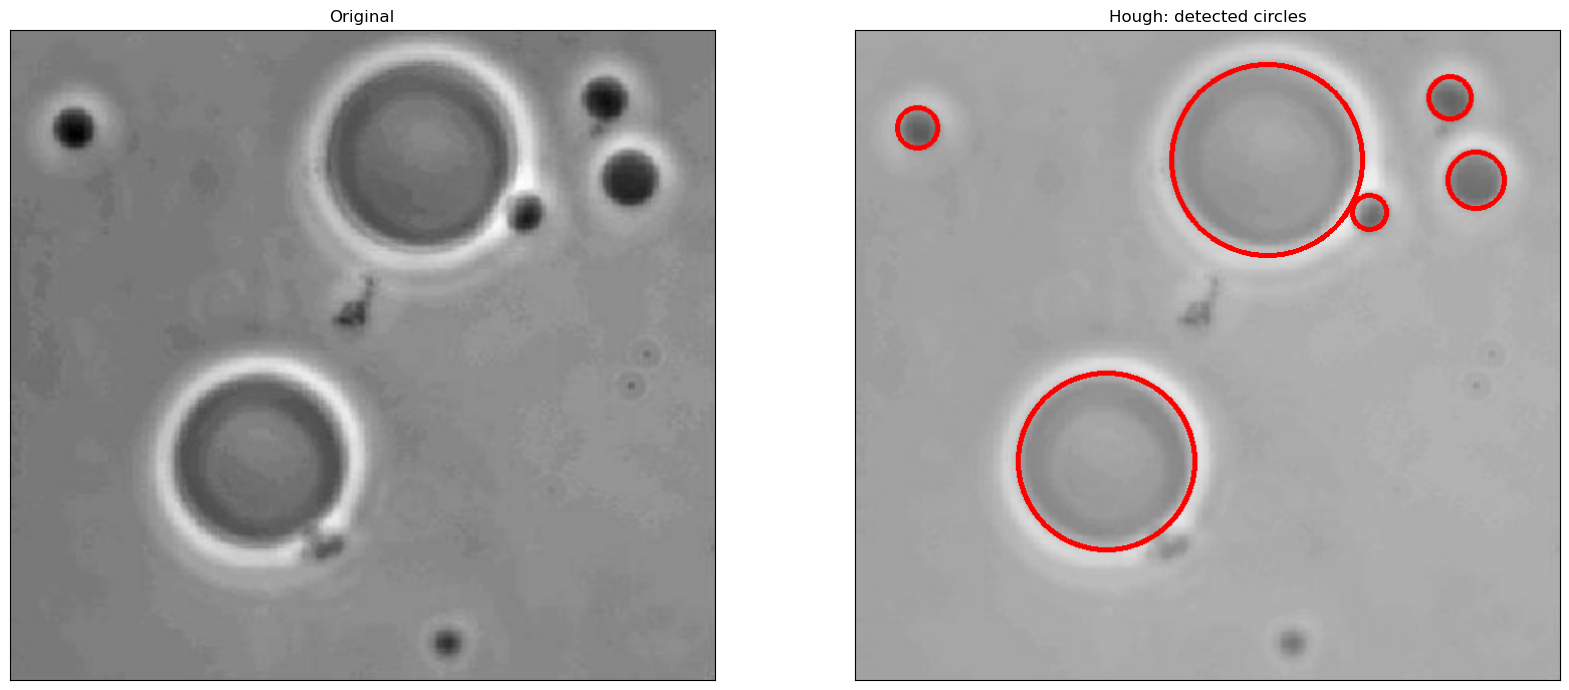

In [12]:
fname = 'Images/Microscope.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
# HoughCircles(image, method, resolution, min distance between centers, 
#              param1 : Canny upper threshold
#              param2 : how many pixels for a circle)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

# Draw the lines
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_dst, center, radius, (255, 0, 0), 3)
        
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected circles'), plt.xticks([]), plt.yticks([])


### Thresholding

(Text(0.5, 1.0, 'Adaptive Thresholding'), ([], []), ([], []))

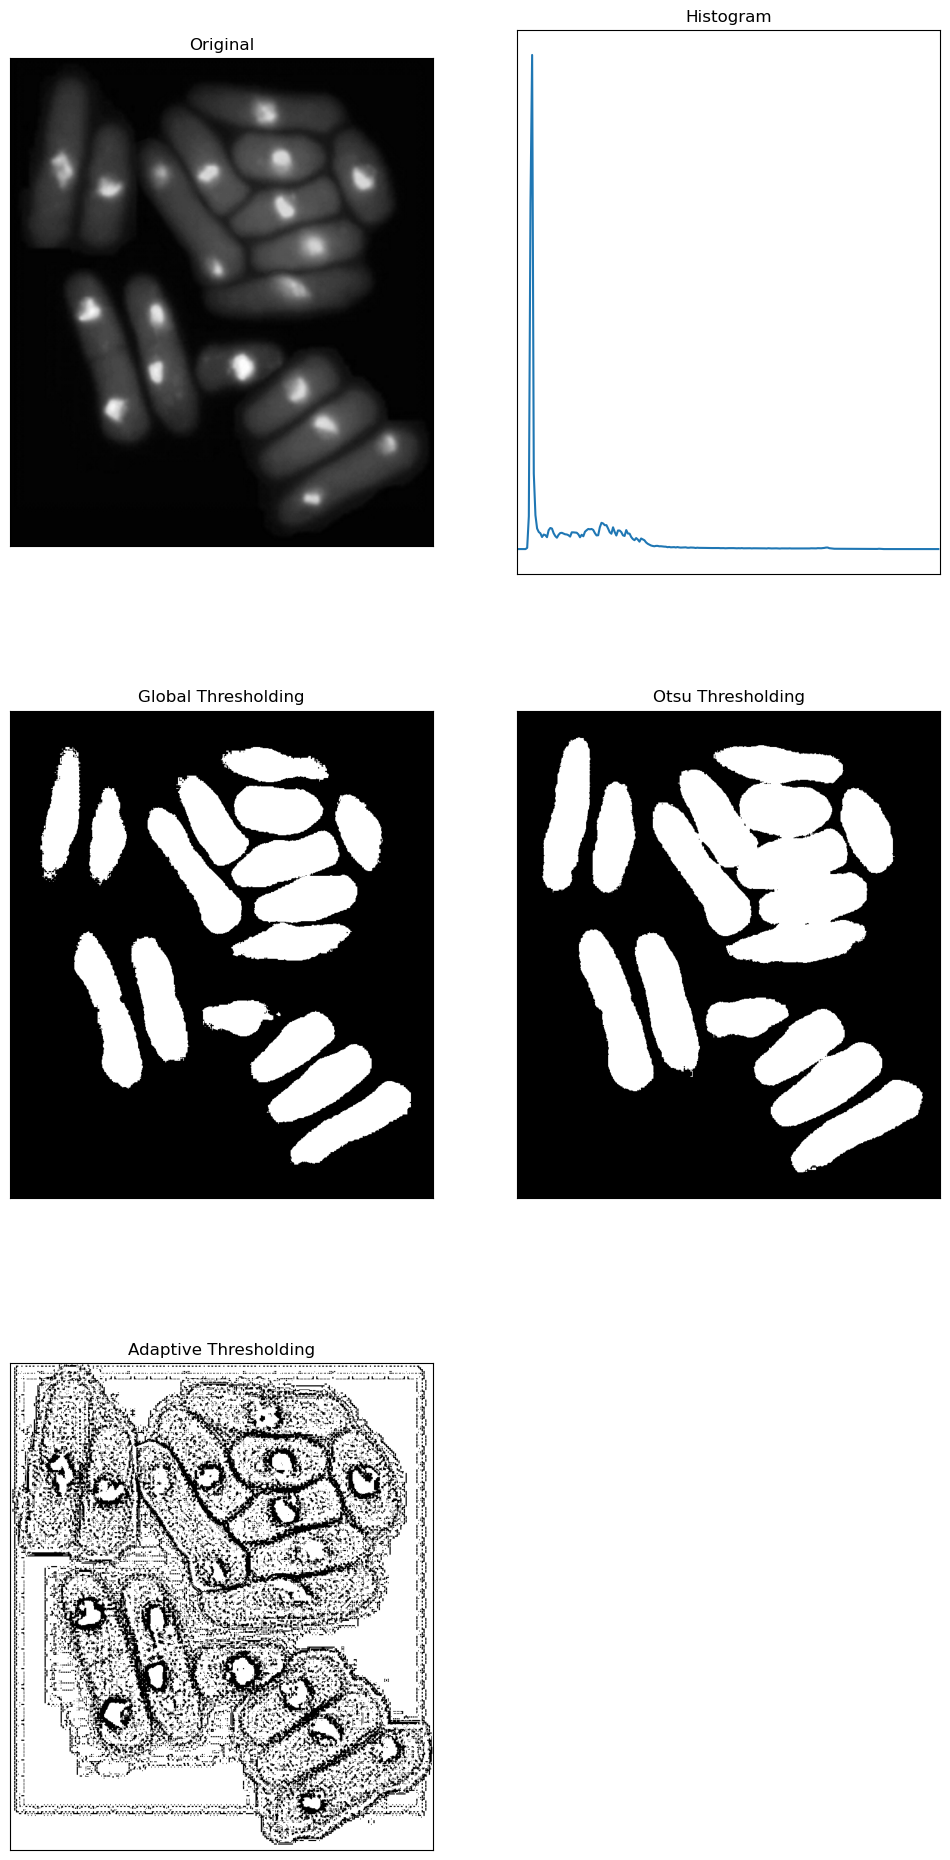

In [13]:

fname = 'Images/Yeast.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)

# histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Global
ret, Gthres = cv2.threshold(img,50,255,cv2.THRESH_BINARY)

# Otsu thresholding
ret, Othres = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Thresholdinh
Athres = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,1)

fig = plt.figure(figsize=(12,24))
plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.plot(hist),plt.xlim([0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(Gthres,cmap = 'gray')
plt.title('Global Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(Othres,cmap = 'gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(Athres,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])



(818, 710) { 0  ...  31 }


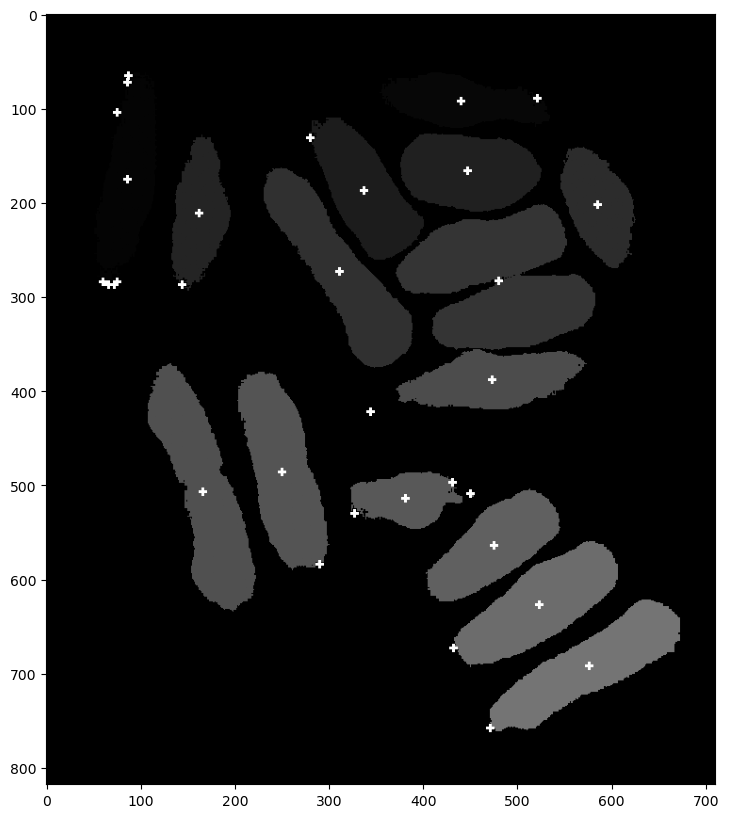

In [14]:
# identify connected components

# apply connected component analysis to the thresholded image (8 connectivity)
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(Gthres, 8, cv2.CV_32S)

def cross (x,y):
    for cross_n in range (5):
        if cross_n == 0:
            xx = x 
            yy = y 
        elif cross_n == 1:
            xx = x -3
            yy = y 
        elif cross_n == 2:
            xx = x +3
            yy = y 
        elif cross_n == 3:
            xx = x 
            yy = y -3
        elif cross_n == 4:
            xx = x 
            yy = y +3
        for u in range (-1,2):
            for v in range (-1,2):
                labels[xx+u,yy+v] = 64
    return

print(labels.shape, '{', np.min(labels), ' ... ', np.max(labels), '}')

for cen in centroids:
    cross (int(cen[1]), int(cen[0])) 


fig = plt.figure(figsize=(10,10))
plt.imshow((labels), cmap='gray')

(Text(0.5, 1.0, 'Adaptive Thresholding'), ([], []), ([], []))

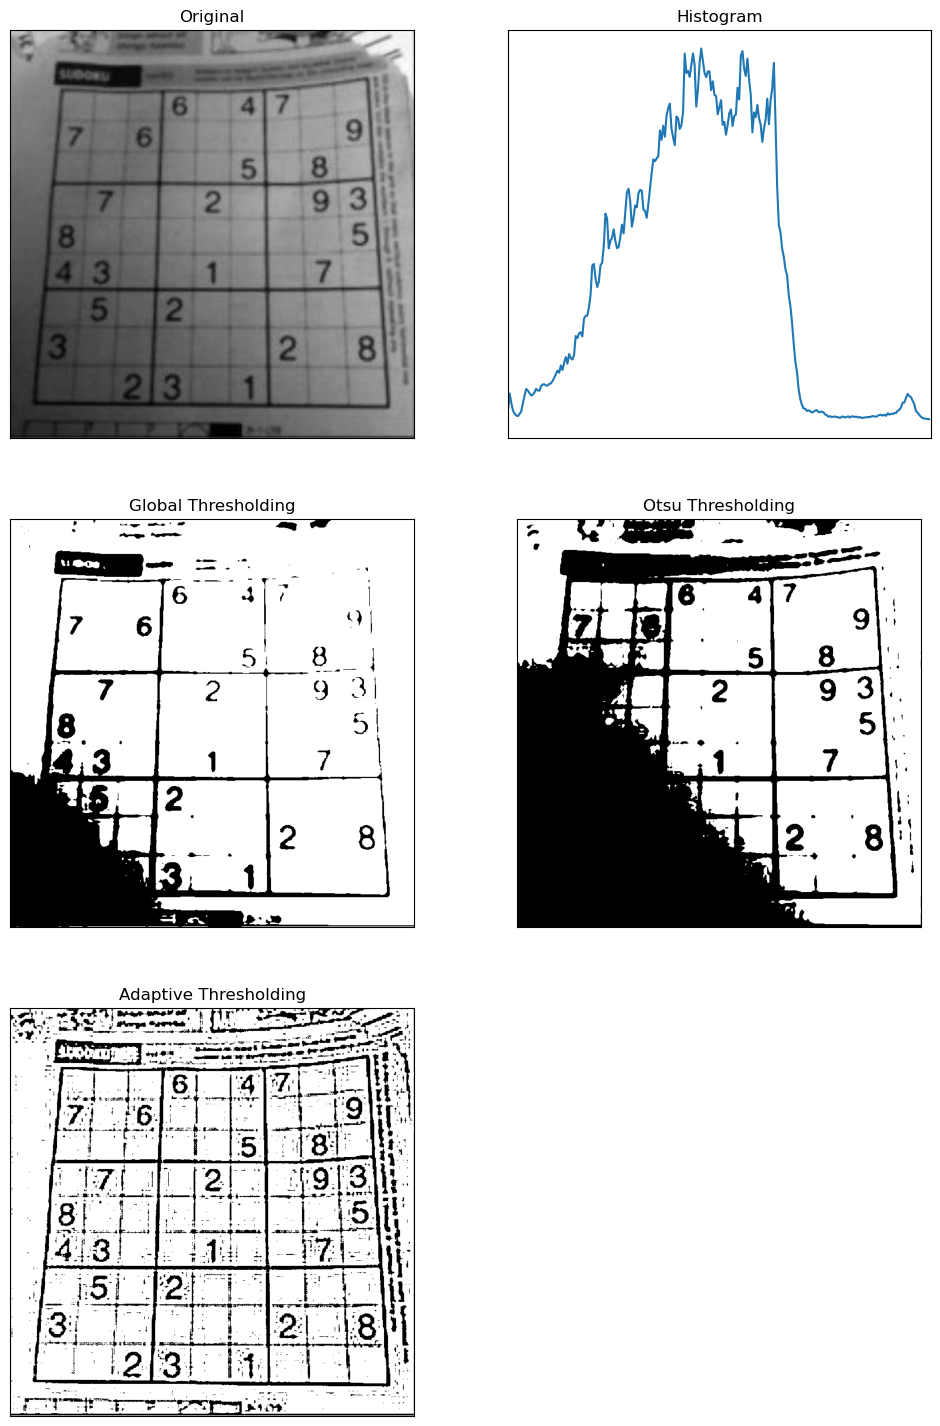

In [15]:
fname = 'Images/Sudoku.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)

# histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Global
ret, Gthres = cv2.threshold(img,75,255,cv2.THRESH_BINARY)

# Otsu thresholding
ret, Othres = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Thresholdinh
athres = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

fig = plt.figure(figsize=(12,18))
plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.plot(hist),plt.xlim([0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(Gthres,cmap = 'gray')
plt.title('Global Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(Othres,cmap = 'gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(athres,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])

